# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        weather_response = requests.get(city_url)
   
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()

             
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | port shepstone
Processing Record 6 of Set 1 | cockburn town
Processing Record 7 of Set 1 | paamiut
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | kalininskaya
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | taguatinga
Processing Record 15 of Set 1 | araouane
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | hervey bay
Processing Record 19 of Set 1 | cocobeach
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | karratha
Processing Record 22 of Set 1 | susangerd
Processing Record 23 of

Processing Record 41 of Set 4 | mucurapo
Processing Record 42 of Set 4 | road town
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | harper
Processing Record 46 of Set 4 | luena
Processing Record 47 of Set 4 | nyrob
Processing Record 48 of Set 4 | ginda
Processing Record 49 of Set 4 | bogovarovo
Processing Record 0 of Set 5 | gucheng
Processing Record 1 of Set 5 | beihai
Processing Record 2 of Set 5 | cooma
Processing Record 3 of Set 5 | novoagansk
Processing Record 4 of Set 5 | rabaul
Processing Record 5 of Set 5 | vuktyl
Processing Record 6 of Set 5 | ostersund
Processing Record 7 of Set 5 | vestmanna
Processing Record 8 of Set 5 | natal
Processing Record 9 of Set 5 | prado
Processing Record 10 of Set 5 | igrim
Processing Record 11 of Set 5 | camden
Processing Record 12 of Set 5 | tuktoyaktuk
Processing Record 13 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 5 | bambanglipuro
Processing Re

Processing Record 33 of Set 8 | kaeo
Processing Record 34 of Set 8 | najran
Processing Record 35 of Set 8 | kapoeta
Processing Record 36 of Set 8 | lata
Processing Record 37 of Set 8 | bom jardim
Processing Record 38 of Set 8 | naron
Processing Record 39 of Set 8 | puerto madryn
Processing Record 40 of Set 8 | belen
Processing Record 41 of Set 8 | flin flon
Processing Record 42 of Set 8 | ballymena
Processing Record 43 of Set 8 | gazli
Processing Record 44 of Set 8 | tiarei
Processing Record 45 of Set 8 | banda aceh
Processing Record 46 of Set 8 | mackay
Processing Record 47 of Set 8 | szentgotthard
Processing Record 48 of Set 8 | alexandria
Processing Record 49 of Set 8 | stokmarknes
Processing Record 0 of Set 9 | zanjan
Processing Record 1 of Set 9 | itarema
Processing Record 2 of Set 9 | san francisco del mar
Processing Record 3 of Set 9 | barcelos
Processing Record 4 of Set 9 | posse
Processing Record 5 of Set 9 | sao jose da coroa grande
Processing Record 6 of Set 9 | waingapu
Pro

City not found. Skipping...
Processing Record 24 of Set 12 | antalaha
Processing Record 25 of Set 12 | kloulklubed
Processing Record 26 of Set 12 | abu zabad
Processing Record 27 of Set 12 | hambantota
Processing Record 28 of Set 12 | kambove
Processing Record 29 of Set 12 | port-cartier
Processing Record 30 of Set 12 | san cristobal
Processing Record 31 of Set 12 | guaruja
Processing Record 32 of Set 12 | borogontsy
Processing Record 33 of Set 12 | la palma
Processing Record 34 of Set 12 | santa clara
Processing Record 35 of Set 12 | salekhard
Processing Record 36 of Set 12 | marzuq
Processing Record 37 of Set 12 | carutapera
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,295.99,71,84,5.66,PF,1669850274
1,sao filipe,14.8961,-24.4956,297.41,65,70,4.06,CV,1669850274
2,puerto ayora,-0.7393,-90.3518,294.57,87,63,4.02,EC,1669850274
3,bethel,41.3712,-73.4140,287.35,73,100,8.23,US,1669850175
4,port shepstone,-30.7414,30.4550,293.71,82,80,9.16,ZA,1669850275


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,295.99,71,84,5.66,PF,1669850274
1,sao filipe,14.8961,-24.4956,297.41,65,70,4.06,CV,1669850274
2,puerto ayora,-0.7393,-90.3518,294.57,87,63,4.02,EC,1669850274
3,bethel,41.3712,-73.4140,287.35,73,100,8.23,US,1669850175
4,port shepstone,-30.7414,30.4550,293.71,82,80,9.16,ZA,1669850275


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

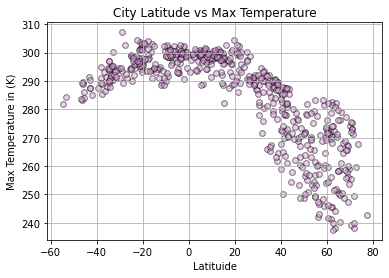

In [9]:
# Build scatter plot for latitude vs. temperature
lat_plot = city_data_df["Lat"].values.tolist()
temp_plot = city_data_df["Max Temp"].values.tolist()

# Incorporate the other graph properties
plt.scatter(lat_plot, temp_plot, marker="8", facecolors="plum", edgecolors="black", alpha = 0.5)

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latituide")
plt.ylabel("Max Temperature in (K)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

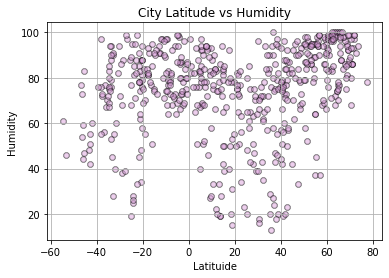

In [10]:
# Build the scatter plots for latitude vs. humidity
lat_plot = city_data_df["Lat"].values.tolist()
hum_plot = city_data_df["Humidity"].values.tolist()

# Incorporate the other graph properties
plt.scatter(lat_plot, hum_plot, marker="8", facecolors="plum", edgecolors="black", alpha = 0.5)

plt.title("City Latitude vs Humidity")
plt.xlabel("Latituide")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

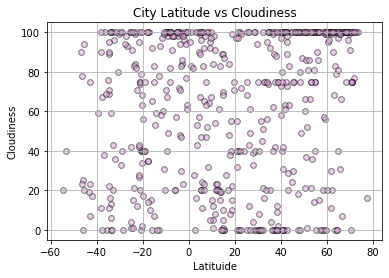

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat_plot = city_data_df["Lat"].values.tolist()
cloud_plot = city_data_df["Cloudiness"].values.tolist()

# Incorporate the other graph properties
plt.scatter(lat_plot, cloud_plot, marker="8", facecolors="plum", edgecolors="black", alpha = 0.5)

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latituide")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

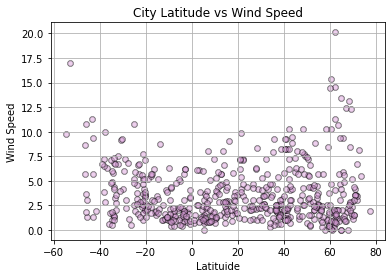

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat_plot = city_data_df["Lat"].values.tolist()
wind_plot = city_data_df["Wind Speed"].values.tolist()

# Incorporate the other graph properties
plt.scatter(lat_plot, wind_plot, marker="8", facecolors="plum", edgecolors="black", alpha = 0.5)

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latituide")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values,marker="8", facecolors="orange", edgecolors="black", alpha = 0.7)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sao filipe,14.8961,-24.4956,297.41,65,70,4.06,CV,1669850274
3,bethel,41.3712,-73.4140,287.35,73,100,8.23,US,1669850175
5,cockburn town,21.4612,-71.1419,299.13,65,40,4.12,TC,1669850275
6,paamiut,61.9940,-49.6678,269.57,84,100,20.12,GL,1669850275
9,barrow,71.2906,-156.7887,271.16,93,100,3.60,US,1669850275


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,295.99,71,84,5.66,PF,1669850274
2,puerto ayora,-0.7393,-90.3518,294.57,87,63,4.02,EC,1669850274
4,port shepstone,-30.7414,30.4550,293.71,82,80,9.16,ZA,1669850275
7,punta arenas,-53.1500,-70.9167,284.21,46,40,16.98,CL,1669850097
8,hermanus,-34.4187,19.2345,289.15,83,69,1.47,ZA,1669849846


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6827784062026167


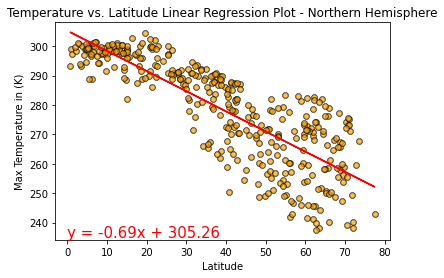

In [16]:
# Linear regression on Northern Hemisphere
title_label = "Temperature vs. Latitude Linear Regression Plot - Northern Hemisphere"
x_label = "Latitude"
y_label = "Max Temperature in (K)"

temp_lat_north = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temperature in (C)", (0,235))




The r-value is: 0.37875297496573274


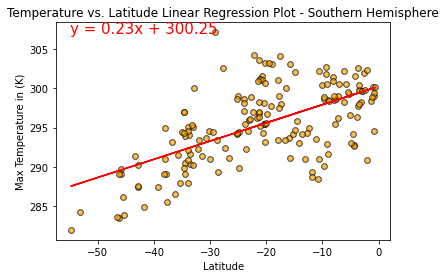

In [17]:
# Linear regression on Southern Hemisphere
title_label = "Temperature vs. Latitude Linear Regression Plot - Southern Hemisphere"
x_label = "Latitude"
y_label = "Max Temperature in (K)"

temp_lat_south = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temperature in (K)", (-55,307))




The northern hemisphere shows a negative correlation with an R-value of 0.7 which suggests a strong correlation. The southern hemisphere shows a positive correlation but with an R-value of 0.4 so this is a weak correlation. 
Cities with a latitude of between 0-30 in the northern hemisphere have their max temperature more closely clustered around the line but as the latitude increases the points become more widely dispersed. Cities in the southern hemisphere have a wider spread of max temperatures around the line with several obvious outliers. 
The lowest max temperature was in the northern hemisphere whose axis goes down to 230, with the southern hemisphere having fewer cities around the lower end of its axis which only goes down to 275. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1318580410846492


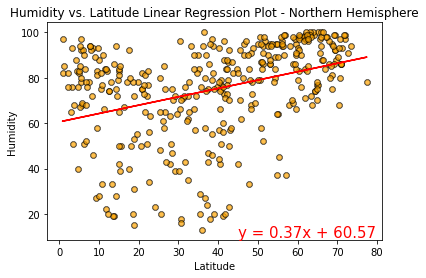

In [18]:
# Northern Hemisphere
title_label = "Humidity vs. Latitude Linear Regression Plot - Northern Hemisphere"
x_label = "Latitude"
y_label = "Humidity"

Humidity_lat_north = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (45,10))



The r-value is: 0.11958791092976845


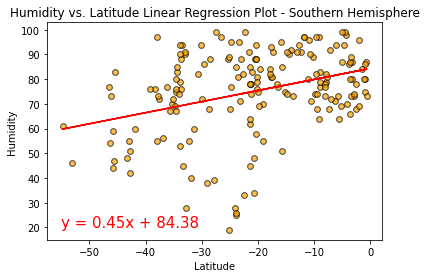

In [19]:
# Southern Hemisphere
title_label = "Humidity vs. Latitude Linear Regression Plot - Southern Hemisphere"
x_label = "Latitude"
y_label = "Humidity"

Humidity_lat_south = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-55,20))



Both the northern and southern hemispheres have a wide dispersion of their humidity figures around the line, with r values of 0.1 suggesting a very weak correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0824432572859834


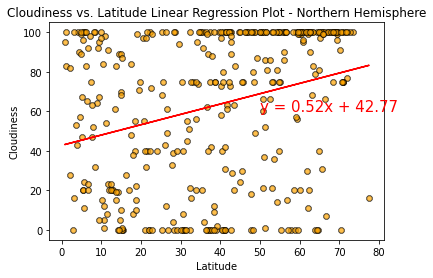

In [20]:
# Northern Hemisphere
title_label = "Cloudiness vs. Latitude Linear Regression Plot - Northern Hemisphere"
x_label = "Latitude"
y_label = "Cloudiness"

Cloudiness_lat_north = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (50,60))



The r-value is: 0.09453748562891354


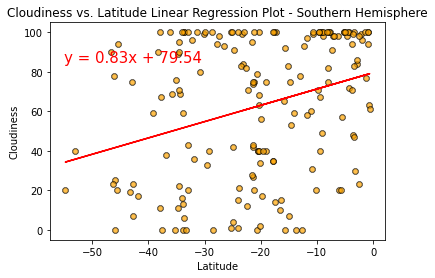

In [21]:
# Southern Hemisphere
title_label = "Cloudiness vs. Latitude Linear Regression Plot - Southern Hemisphere"
x_label = "Latitude"
y_label = "Cloudiness"

Cloudiness_lat_south = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55,85))



Both the northern and southern hemispheres have a wide dispersion of their cloudiness figures around the line, with r values of 0.1 suggesting a very weak correlation. Both hemispheres have points clustered around the top and the bottom of the scales which means there is a wide spread of data affecting any measures of centrality. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017149155656533865


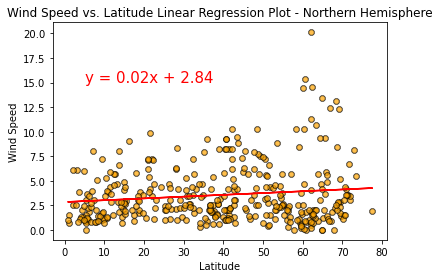

In [22]:
# Northern Hemisphere
title_label = "Wind Speed vs. Latitude Linear Regression Plot - Northern Hemisphere"
x_label = "Latitude"
y_label = "Wind Speed"

Wind_lat_north = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (5,15))




The r-value is: 0.21935967808504933


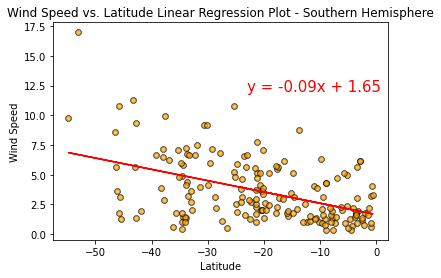

In [23]:
# Southern Hemisphere
title_label = "Wind Speed vs. Latitude Linear Regression Plot - Southern Hemisphere"
x_label = "Latitude"
y_label = "Wind Speed"

Wind_lat_south = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-23,12))



The northern hemisphere has many of the points clustered around the bottom of the scale, however, as the latitude increases to the 60 -80 mark, there is a much wider spread of wind speeds with several being 15m/s plus. This will affect the R-value, which is 0.02 suggesting a very weak correlation, which for the northern hemisphere is positive. The data in the south has a higher r value of 0.2 which suggests a weak correlation, which is negative. As the latitude becomes more negative the city’s wind speeds become more despised with some outliers at the very bottom of the latitude scale. 